Verificar artigos de toxicidade em texto

In [ ]:
import nltk
nltk.download('stopwords')

stop_words = set(nltk.corpus.stopwords.words('english'))
vectorizer = CountVectorizer(analyzer='word', stop_words=stop_words, tokenizer=tknzr.tokenize)
X = vectorizer.fit_transform(small_train.comment_text)

In [ ]:
#geral
import pandas as pd
import numpy as np

#sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

#visual
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# monta o google drive
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/Mineração de Dados/data/all_data.csv')

In [ ]:
train = df[df['split'] == 'train']
train = train.dropna(subset=['comment_text', 'toxicity'])
train

,id,comment_text,split,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,toxicity,severe_toxicity,obscene,sexual_explicit,identity_attack,insult,threat,male,female,transgender,other_gender,heterosexual,homosexual_gay_or_lesbian,bisexual,other_sexual_orientation,christian,jewish,muslim,hindu,buddhist,atheist,other_religion,black,white,asian,latino,other_race_or_ethnicity,physical_disability,intellectual_or_learning_disability,psychiatric_or_mental_illness,other_disability,identity_annotator_count,toxicity_annotator_count
0,1083994,He got his money... now he lies in wait till a...,train,2017-03-06 15:21:53.675241+00,21,NaN,317120,approved,0,0,0,2,0,0.373134,0.044776,0.089552,0.014925,0.000000,0.343284,0.014925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,67
1,650904,Mad dog will surely put the liberals in mental...,train,2016-12-02 16:44:21.329535+00,21,NaN,154086,approved,0,0,1,2,0,0.605263,0.013158,0.065789,0.013158,0.092105,0.565789,0.065789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,76
2,5902188,And Trump continues his lifelong cowardice by ...,train,2017-09-05 19:05:32.341360+00,55,NaN,374342,approved,1,0,2,3,7,0.666667,0.015873,0.031746,0.000000,0.047619,0.666667,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,63
4,5410943,Tucker and Paul are both total bad ass mofo's.,train,2017-06-14 05:08:21.997315+00,21,NaN,344096,approved,0,0,0,1,0,0.550000,0.037500,0.337500,0.275000,0.037500,0.487500,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,80
5,6290444,"Cry me a river, why don't you.\nDrinking, drug...",train,2017-11-04 22:04:11.596185+00,54,6290143.0,396946,rejected,0,0,0,0,0,0.203390,0.016949,0.050847,0.000000,0.033898,0.203390,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999511,1018736,Another man shamming article. If white men did...,train,2017-02-20 07:20:49.964620+00,54,NaN,169202,approved,0,0,0,2,0,0.400000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.700000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.00000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,10,10
1999512,340016,"""no matter what is put in front of you regardi...",train,2016-06-06 06:43:04.780968+00,21,339965.0,137961,approved,0,0,0,1,0,0.400000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.600000,0.000000,0.800000,0.000000,0.0,0.100000,0.00000,0.100000,0.00000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,10,10
1999513,919629,The Democrat party aided and abetted by it's M...,train,2017-01-30 02:44:29.168863+00,54,NaN,164845,rejected,0,1,0,3,2,0.400000,0.000000,0.200000,0.100000,0.300000,0.300000,0.000000,0.000000,0.363636,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.00000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,11,10
1999514,5165492,I just don't find her a very good representati...,train,2017-04-22 18:42:02.442987+00,54,NaN,328877,approved,1,0,0,3,0,0.400000,0.000000,0.000000,0.000000,0.200000,0.100000,0.000000,0.000000,0.141264,0.765799,0.052045,0.0,0.033457,0.01487,0.256506,0.00000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003717,0.0,0.0,0.00000,269,10


In [ ]:
from nltk.tokenize import TweetTokenizer

#tknzr = TweetTokenizer()
#tknzr.tokenize(train.comment_text[357165])
#train[train.comment_text.str.match(":\)")]
train[train.comment_text.str.match(".*\(.*")]

,id,comment_text,split,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,toxicity,severe_toxicity,obscene,sexual_explicit,identity_attack,insult,threat,male,female,transgender,other_gender,heterosexual,homosexual_gay_or_lesbian,bisexual,other_sexual_orientation,christian,jewish,muslim,hindu,buddhist,atheist,other_religion,black,white,asian,latino,other_race_or_ethnicity,physical_disability,intellectual_or_learning_disability,psychiatric_or_mental_illness,other_disability,identity_annotator_count,toxicity_annotator_count
30,830155,Stupid is what stupid thinks (and says).\n\nCh...,train,2017-01-12 18:07:33.162022+00,54,828567.0,161383,approved,1,0,0,0,0,0.928571,0.042857,0.214286,0.0,0.185714,0.914286,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,70
35,6297649,"The answer to your question, shiftworker1, is ...",train,2017-11-06 03:18:03.692776+00,54,6296149.0,397418,approved,0,0,0,0,0,0.015436,0.000000,0.001342,0.0,0.000671,0.014765,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1490
54,5070831,I see their share price is up. Proof positive ...,train,2017-03-29 21:54:50.887027+00,54,NaN,323065,approved,0,0,0,3,0,0.612500,0.012500,0.075000,0.0,0.025000,0.600000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,80
142,4976349,"I was in Tokyo, Japan last year and for the mo...",train,2017-03-08 17:04:35.718331+00,54,NaN,317615,approved,0,0,2,5,5,0.036770,0.000000,0.000721,0.0,0.009373,0.024513,0.000721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1387
209,512805,Douglas: You're right. A caption explaining t...,train,2016-10-07 15:07:50.122326+00,13,512184.0,147712,approved,0,0,0,3,0,0.142857,0.000000,0.142857,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999449,6232806,Anyone who defends the wearing of this niqab i...,train,2017-10-27 08:59:36.393867+00,54,NaN,390972,approved,0,0,0,1,0,0.400000,0.100000,0.000000,0.0,0.200000,0.300000,0.000000,0.0,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,10
1999462,907210,"Based on your previous posts, one assumes that...",train,2017-01-27 16:34:31.640121+00,53,901082.0,164215,rejected,0,0,0,0,0,0.400000,0.000000,0.000000,0.0,0.300000,0.400000,0.000000,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.8,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,10
1999474,5152170,"Not every time, but anytime the opinions held ...",train,2017-04-19 19:27:19.726836+00,54,5151628.0,327856,approved,0,0,0,2,0,0.400000,0.000000,0.100000,0.0,0.400000,0.200000,0.000000,0.0,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,10
1999483,6248884,Most Illegal Aliens strongly believe in Racist...,train,2017-10-30 02:39:07.387390+00,55,6248837.0,394615,rejected,0,0,0,0,0,0.400000,0.000000,0.000000,0.0,0.200000,0.400000,0.000000,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.5,0.3,0.0,0.0,0.0,0.0,10,10


<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


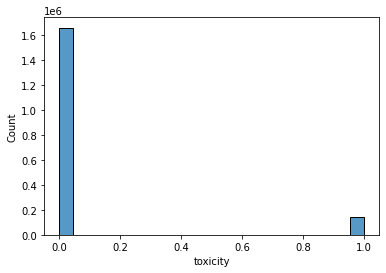

In [ ]:
y_train = train.toxicity >= 0.5
y_train
sns.histplot(y_train)

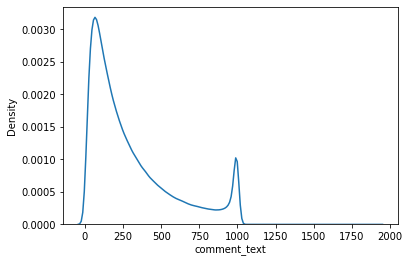

In [ ]:
sns.kdeplot(train.comment_text.str.len())

In [ ]:
small_train = train.sample(n=5000, random_state=42)
small_train

,id,comment_text,split,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,toxicity,severe_toxicity,obscene,sexual_explicit,identity_attack,insult,threat,male,female,transgender,other_gender,heterosexual,homosexual_gay_or_lesbian,bisexual,other_sexual_orientation,christian,jewish,muslim,hindu,buddhist,atheist,other_religion,black,white,asian,latino,other_race_or_ethnicity,physical_disability,intellectual_or_learning_disability,psychiatric_or_mental_illness,other_disability,identity_annotator_count,toxicity_annotator_count
318109,5119812,"I agree with many of your points, but not the ...",train,2017-04-11 14:15:44.440824+00,54,5119048.0,326022,approved,0,0,0,3,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4
464793,6176142,"Trump has disrespected the entire country, and...",train,2017-10-19 01:37:09.917131+00,102,NaN,390742,approved,0,0,0,5,0,0.806452,0.096774,0.048387,0.080645,0.080645,0.822581,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,62
1169998,506678,Continuing...a recent conversation about the p...,train,2016-10-04 19:41:59.062297+00,21,NaN,147513,approved,0,0,0,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4
1532542,1013823,"First, any Breitbart article should be deemed ...",train,2017-02-18 20:44:18.742427+00,53,1010829.0,168945,approved,0,0,0,2,0,0.500000,0.000000,0.000000,0.000000,0.500000,0.300000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,10
283859,5224719,That's how the working class voted!,train,2017-05-06 21:51:39.400363+00,55,5224578.0,332568,approved,1,0,0,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1405342,519959,The Democrat and Republican establishment has ...,train,2016-10-10 20:22:26.360636+00,21,NaN,148145,approved,0,0,0,0,0,0.166667,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,6
384713,5300602,"While these games are hardly new, the district...",train,2017-05-25 05:07:53.987612+00,21,NaN,337412,approved,1,0,1,13,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,7
1264597,5529646,"""Divisions are to be expected in a diverse soc...",train,2017-07-05 01:57:31.337066+00,21,NaN,351649,approved,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4
1660484,5460325,Republican margins of victory in Georgia's 6th...,train,2017-06-22 18:28:53.332778+00,54,5458668.0,346931,approved,0,0,0,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4


In [ ]:
Y = small_train['toxicity'] >= 0.5

In [ ]:
from nltk.tokenize import TweetTokenizer

tknzr = TweetTokenizer()
vectorizer = CountVectorizer(analyzer='word', tokenizer=tknzr.tokenize)

In [ ]:
X = vectorizer.fit_transform(small_train['comment_text'])
X

<5000x141865 sparse matrix of type '<class 'numpy.int64'>'
	with 277147 stored elements in Compressed Sparse Row format>

## Análise amostra

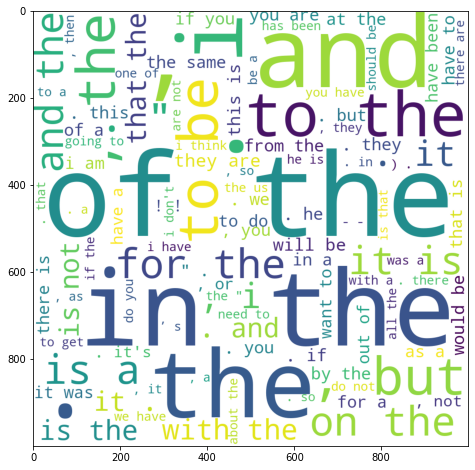

In [ ]:
freq = X.toarray().sum(axis=0)
words = vectorizer.get_feature_names()

freq_words = dict(zip(words, freq))

wc = WordCloud(background_color="white",width=1000,height=1000, max_words=100).generate_from_frequencies(freq_words)
plt.figure(figsize=(15, 8))
plt.imshow(wc)

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


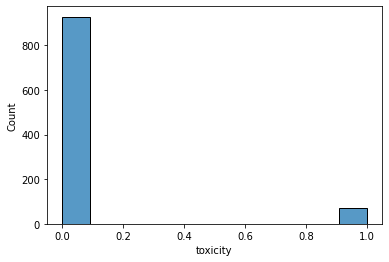

In [ ]:
sns.histplot(Y)

# TOXICO

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


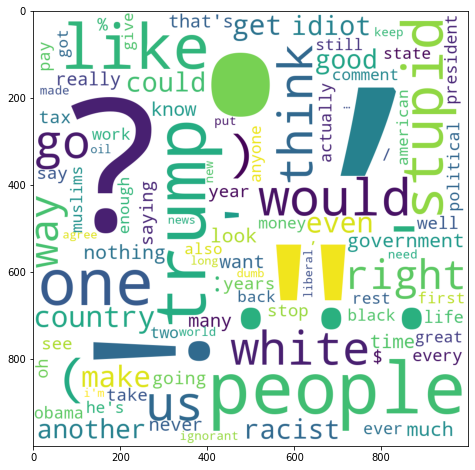

In [ ]:
toxico = small_train[small_train['toxicity'] >= 0.5]

import nltk
nltk.download('stopwords')

stop_words = set(nltk.corpus.stopwords.words('english'))
vectorizer = CountVectorizer(analyzer='word', stop_words=stop_words, tokenizer=tknzr.tokenize)

X = vectorizer.fit_transform(toxico['comment_text'])

freq = X.toarray().sum(axis=0)
words = vectorizer.get_feature_names()

freq_words = dict(zip(words, freq))

wc = WordCloud(background_color="white",width=1000,height=1000, max_words=100).generate_from_frequencies(freq_words)
plt.figure(figsize=(15, 8))
plt.imshow(wc)

## Removendo stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


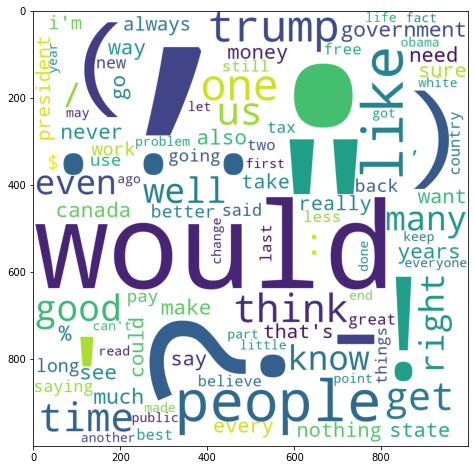

In [ ]:
import nltk
nltk.download('stopwords')

stop_words = set(nltk.corpus.stopwords.words('english'))
vectorizer = CountVectorizer(analyzer='word', stop_words=stop_words, tokenizer=tknzr.tokenize)
X = vectorizer.fit_transform(small_train.comment_text)

freq = X.toarray().sum(axis=0)
words = vectorizer.get_feature_names()

freq_words = dict(zip(words, freq))

wc = WordCloud(background_color="white",width=1000,height=1000, max_words=100).generate_from_frequencies(freq_words)
plt.figure(figsize=(15, 8))
plt.imshow(wc)

## Removendo stopwords e caracteres especiais

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


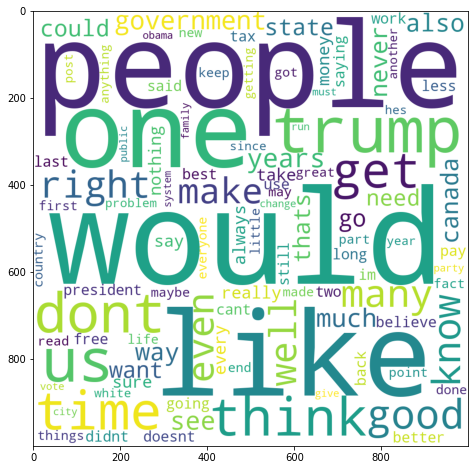

In [ ]:
import nltk
nltk.download('stopwords')

stop_words = set(nltk.corpus.stopwords.words('english'))
vectorizer = CountVectorizer(analyzer='word', stop_words=stop_words, tokenizer=tknzr.tokenize)
X = vectorizer.fit_transform(small_train.comment_text.replace('[^a-zA-Z0-9_ ]+', '', regex=True))

freq = X.toarray().sum(axis=0)
words = vectorizer.get_feature_names()

freq_words = dict(zip(words, freq))

wc = WordCloud(background_color="white",width=1000,height=1000, max_words=100).generate_from_frequencies(freq_words)
plt.figure(figsize=(15, 8))
plt.imshow(wc)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [ ]:
X = vectorizer.fit_transform(train['comment_text'])
X

<1804874x488903 sparse matrix of type '<class 'numpy.int64'>'
	with 48874385 stored elements in Compressed Sparse Row format>

,id,comment_text,split,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,toxicity,severe_toxicity,obscene,sexual_explicit,identity_attack,insult,threat,male,female,transgender,other_gender,heterosexual,homosexual_gay_or_lesbian,bisexual,other_sexual_orientation,christian,jewish,muslim,hindu,buddhist,atheist,other_religion,black,white,asian,latino,other_race_or_ethnicity,physical_disability,intellectual_or_learning_disability,psychiatric_or_mental_illness,other_disability,identity_annotator_count,toxicity_annotator_count
0,1083994,He got his money... now he lies in wait till a...,train,2017-03-06 15:21:53.675241+00,21,NaN,317120,approved,0,0,0,2,0,0.373134,0.044776,0.089552,0.014925,0.000000,0.343284,0.014925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,67
1,650904,Mad dog will surely put the liberals in mental...,train,2016-12-02 16:44:21.329535+00,21,NaN,154086,approved,0,0,1,2,0,0.605263,0.013158,0.065789,0.013158,0.092105,0.565789,0.065789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,76
2,5902188,And Trump continues his lifelong cowardice by ...,train,2017-09-05 19:05:32.341360+00,55,NaN,374342,approved,1,0,2,3,7,0.666667,0.015873,0.031746,0.000000,0.047619,0.666667,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,63
4,5410943,Tucker and Paul are both total bad ass mofo's.,train,2017-06-14 05:08:21.997315+00,21,NaN,344096,approved,0,0,0,1,0,0.550000,0.037500,0.337500,0.275000,0.037500,0.487500,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,80
5,6290444,"Cry me a river, why don't you.\nDrinking, drug...",train,2017-11-04 22:04:11.596185+00,54,6290143.0,396946,rejected,0,0,0,0,0,0.203390,0.016949,0.050847,0.000000,0.033898,0.203390,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999511,1018736,Another man shamming article. If white men did...,train,2017-02-20 07:20:49.964620+00,54,NaN,169202,approved,0,0,0,2,0,0.400000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.700000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.00000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,10,10
1999512,340016,"""no matter what is put in front of you regardi...",train,2016-06-06 06:43:04.780968+00,21,339965.0,137961,approved,0,0,0,1,0,0.400000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.600000,0.000000,0.800000,0.000000,0.0,0.100000,0.00000,0.100000,0.00000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,10,10
1999513,919629,The Democrat party aided and abetted by it's M...,train,2017-01-30 02:44:29.168863+00,54,NaN,164845,rejected,0,1,0,3,2,0.400000,0.000000,0.200000,0.100000,0.300000,0.300000,0.000000,0.000000,0.363636,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.00000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,11,10
1999514,5165492,I just don't find her a very good representati...,train,2017-04-22 18:42:02.442987+00,54,NaN,328877,approved,1,0,0,3,0,0.400000,0.000000,0.000000,0.000000,0.200000,0.100000,0.000000,0.000000,0.141264,0.765799,0.052045,0.0,0.033457,0.01487,0.256506,0.00000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003717,0.0,0.0,0.00000,269,10


In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X.toarray(), Y)

In [ ]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test.toarray())

print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

       False       0.92      0.97      0.95       227
        True       0.45      0.22      0.29        23

    accuracy                           0.90       250
   macro avg       0.69      0.60      0.62       250
weighted avg       0.88      0.90      0.89       250



# Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler(random_state=0)
X_under, y_under = under_sampler.fit_resample(train[['comment_text']], y_train)

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


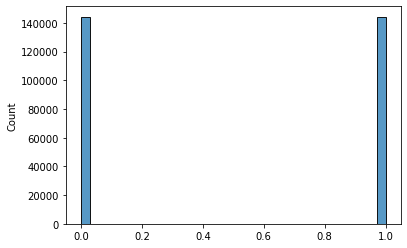

In [ ]:
sns.histplot(y_under)

In [ ]:
X_under

array([["Ummm, EV owners already pay an annual surcharge to cover (up to ~20,000 miles annual driving) the gas tax they don't pay.\n\nWas CO planning to overcharge EV owners?"],
       ["Of course under the secretive net profits SB-21, BP can now make a killing off of Alaskans with this deal.  Here is how it works.\n\n1.  Sell the building to a subsidiary.\n\n2.  Lease the building from its subsidiary at a very, very high price.\n\n3.  Write off these inflated expenses against the oil it removes from Alaska.\n\n\nPresto, BP makes millions more than they would if they'd just simply maintained its existing ownership of the building.\n\nA technique very similar to this has been employed with the oil pipeline ownership for decades."],
       ['Does it escape you that for "once", he\'s done nothing much to warrant the criticism he so richly deserves on other occasions?'],
       ...,
       ["Get your head out of your s. NADA you just described how the idiot in chief is destroying our count

# BERT